# Dimensionality Reduction in Python

## Course Description
High-dimensional datasets can be overwhelming and leave you not knowing where to start. Typically, you’d visually explore a new dataset first, but when you have too many dimensions the classical approaches will seem insufficient. Fortunately, there are visualization techniques designed specifically for high dimensional data and you’ll be introduced to these in this course. After exploring the data, you’ll often find that many features hold little information because they don’t show any variance or because they are duplicates of other features. You’ll learn how to detect these features and drop them from the dataset so that you can focus on the informative ones. In a next step, you might want to build a model on these features, and it may turn out that some don’t have any effect on the thing you’re trying to predict. You’ll learn how to detect and drop these irrelevant features too, in order to reduce dimensionality and thus complexity. Finally, you’ll learn how feature extraction techniques can reduce dimensionality for you through the calculation of uncorrelated principal components.

### Removing features without variance
A sample of the Pokemon dataset has been loaded as pokemon_df. To get an idea of which features have little variance you should use the IPython Shell to calculate summary statistics on this sample. Then adjust the code to create a smaller, easier to understand, dataset.

In [10]:
import pandas as pd
import numpy as np


In [11]:
pokemon_df = pd.read_csv('datasets/pokemon.csv')

In [12]:
# Leave this list as is
number_cols = ['HP', 'Attack', 'Defense']

# Remove the feature without variance from this list
non_number_cols = ['Name', 'Type 1']

# Create a new dataframe by subselecting the chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
df_selected.head()

,HP,Attack,Defense,Name,Type 1
0,45,49,49,Bulbasaur,Grass
1,60,62,63,Ivysaur,Grass
2,80,82,83,Venusaur,Grass
3,80,100,123,VenusaurMega Venusaur,Grass
4,39,52,43,Charmander,Fire


### Visually detecting redundant features
Data visualization is a crucial step in any data exploration. Let's use Seaborn to explore some samples of the US Army ANSUR body measurement dataset.

Two data samples have been pre-loaded as ansur_df_1 and ansur_df_2.

Seaborn has been imported as sns.

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [41]:
ansur_df_1 = pd.read_csv('datasets/ANSUR_II_MALE.csv', usecols=['Gender', 'weight_kg', 'stature_m', 'handlength'])
ansur_df_2= pd.read_csv('datasets/ANSUR_II_FEMALE.csv', usecols=['Gender', 'weight_kg', 'stature_m', 'handlength'])


In [55]:
ansur = pd.concat([ansur_df_1, ansur_df_2])

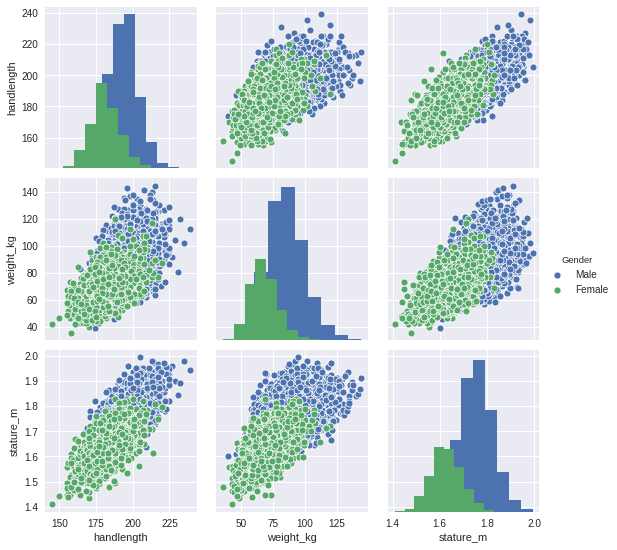

In [54]:

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

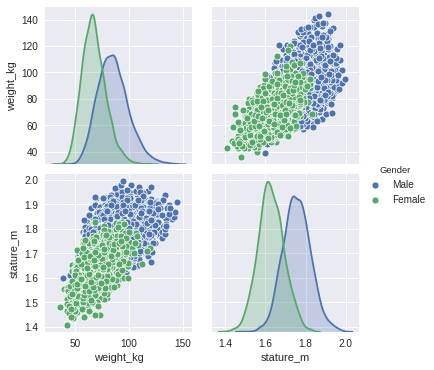

In [56]:
# Remove one of the redundant features 
reduced_df = ansur.drop('handlength', axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender')

# Show the plot
plt.show()

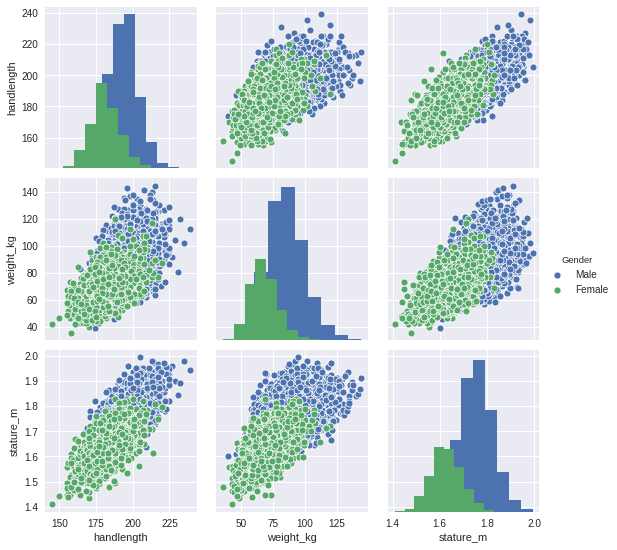

In [60]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur, hue='Gender', diag_kind='hist')


# Show the plot
plt.show()



### Fitting t-SNE to the ANSUR data
t-SNE is a great technique for visual exploration of high dimensional datasets. In this exercise, you'll apply it to the ANSUR dataset. You'll remove non-numeric columns from the pre-loaded dataset df and fit TSNE to his numeric dataset.

In [64]:
ansur_df_1 = pd.read_csv('datasets/ANSUR_II_MALE.csv')
ansur_df_2= pd.read_csv('datasets/ANSUR_II_FEMALE.csv')
df = pd.concat([ansur_df_1, ansur_df_2])

In [71]:
from sklearn.manifold import TSNE

# Non-numerical columns in the dataset
non_numeric = ['Gender', 'Height_class', 'Component', 'Branch', 'BMI_class']

# Drop the non-numerical columns from df
df_numeric = df.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

(6068, 2)


### t-SNE visualisation of dimensionality
Time to look at the results of your hard work. In this exercise, you will visualize the output of t-SNE dimensionality reduction on the combined male and female Ansur dataset. You'll create 3 scatterplots of the 2 t-SNE features ('x' and 'y') which were added to the dataset df. In each scatterplot you'll color the points according to a different categorical variable.

seaborn has already been imported as sns and matplotlib.pyplot as plt.

In [84]:
tsne = pd.DataFrame(tsne_features, columns=['x', 'y'])

In [100]:
ansur_df_1 = pd.read_csv('datasets/ANSUR_II_MALE.csv')
ansur_df_2= pd.read_csv('datasets/ANSUR_II_FEMALE.csv')
df = pd.concat([ansur_df_1, ansur_df_2])
df = df.assign(x=tsne['x'], y=tsne['y'])

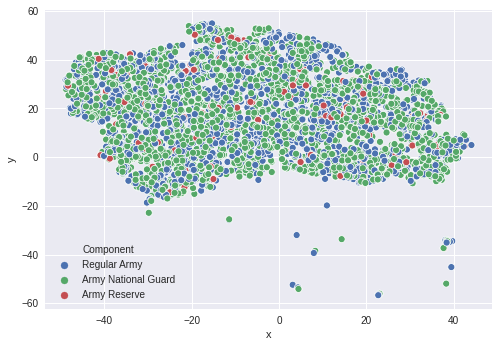

In [102]:
# Color the points according to Army Component
sns.scatterplot(x="x", y="y", hue='Component', data=df)

# Show the plot
plt.show()

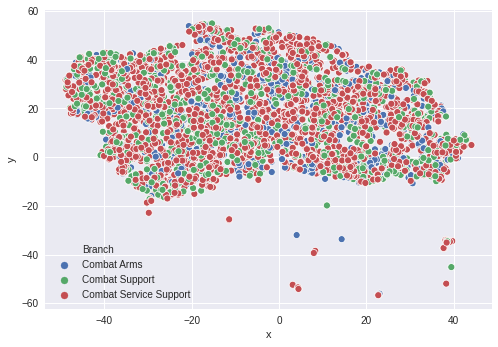

In [103]:
# Color the points by Army Branch
sns.scatterplot(x="x", y="y", hue='Branch', data=df)

# Show the plot
plt.show()

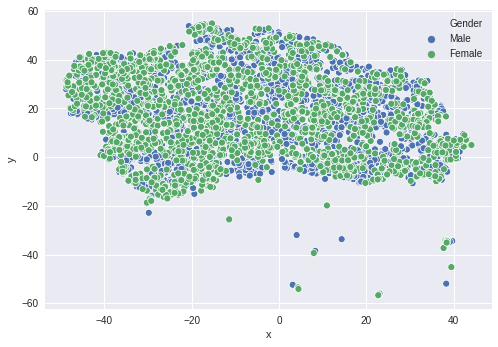

In [104]:
# Color the points by Gender
sns.scatterplot(x="x", y="y", hue='Gender', data=df)

# Show the plot
plt.show()

### Train - test split
In this chapter, you will keep working with the ANSUR dataset. Before you can build a model on your dataset, you should first decide on which feature you want to predict. In this case, you're trying to predict gender.

You need to extract the column holding this feature from the dataset and then split the data into a training and test set. The training set will be used to train the model and the test set will be used to check its performance on unseen data.

ansur_df has been pre-loaded for you.

In [113]:
ansur_df_1 = pd.read_csv('datasets/ANSUR_II_MALE.csv')
ansur_df_2= pd.read_csv('datasets/ANSUR_II_FEMALE.csv')
ansur_df = pd.concat([ansur_df_1, ansur_df_2])

In [114]:
# Non-numerical columns in the dataset
non_numeric = ['Height_class', 'Component', 'Branch', 'BMI_class']

# Drop the non-numerical columns from df
ansur_df.drop(non_numeric, axis=1, inplace=True)

In [115]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop('Gender', axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

1821 rows in test set vs. 4247 in training set. 94 Features.


### Fitting and testing the model
In the previous exercise, you split the dataset into X_train, X_test, y_train, and y_test. These datasets have been pre-loaded for you. You'll now create a support vector machine classifier model (SVC()) and fit that to the training data. You'll then calculate the accuracy on both the test and training set to detect overfitting.

In [116]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

99.0% accuracy on test set vs. 99.0% on training set


### Accuracy after dimensionality reduction
You'll reduce the overfit with the help of dimensionality reduction. In this case, you'll apply a rather drastic form of dimensionality reduction by only selecting a single column that has some good information to distinguish between genders. You'll repeat the train-test split, model fit and prediction steps to compare the accuracy on test vs. training data.

All relevant packages and y have been pre-loaded.

In [120]:
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[['neckcircumferencebase']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

93.0% accuracy on test set vs. 93.4% on training set


### Finding a good variance threshold
You'll be working on a slightly modified subsample of the ANSUR dataset with just head measurements pre-loaded as head_df.

In [126]:
ansur_df_1 = pd.read_csv('datasets/ANSUR_II_MALE.csv', usecols=['headbreadth', 'headcircumference', 'headlength', 'tragiontopofhead'])
ansur_df_2= pd.read_csv('datasets/ANSUR_II_FEMALE.csv', usecols=['headbreadth', 'headcircumference', 'headlength', 'tragiontopofhead'])

head_df = pd.concat([ansur_df_1, ansur_df_2])

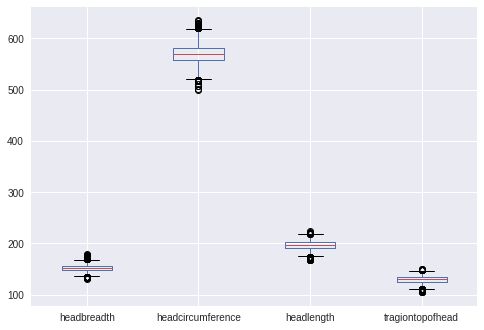

In [127]:

# Create the boxplot
head_df.boxplot()

plt.show()


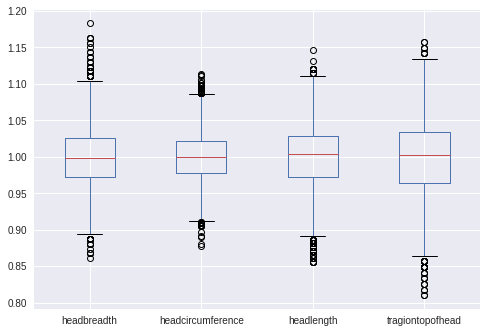

In [128]:
# Normalize the data
normalized_df = head_df / head_df.mean()

normalized_df.boxplot()
plt.show()

In [129]:
# Normalize the data
normalized_df = head_df / head_df.mean()

# Print the variances of the normalized data
print(normalized_df.var())

headbreadth          0.001679
headcircumference    0.001030
headlength           0.001868
tragiontopofhead     0.002640
dtype: float64


### Features with low variance
In the previous exercise you established that 0.001 is a good threshold to filter out low variance features in head_df after normalization. Now use the VarianceThreshold feature selector to remove these features.

In [130]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = head_df.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(head_df.shape[1], reduced_df.shape[1]))

Dimensionality reduced from 4 to 4.


### Removing features with many missing values
You'll apply feature selection on the Boston Public Schools dataset which has been pre-loaded as school_df. Calculate the missing value ratio per feature and then create a mask to remove features with many missing values.

In [132]:
school_df = pd.read_csv('datasets/Public_Schools2.csv')

In [133]:
# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:, mask]

print(school_df.shape)
print(reduced_df.shape)

(131, 21)
(131, 19)


### Removing features with many missing values
You'll apply feature selection on the Boston Public Schools dataset which has been pre-loaded as school_df. Calculate the missing value ratio per feature and then create a mask to remove features with many missing values.

In [171]:
cmap = plt.cm.inferno

In [176]:
columns = ['elbowrestheight', 'wristcircumference', 'elbowrestheight', 'anklecircumference', 'buttockheight', 
           'crotchheight']
ansur_df_1 = pd.read_csv('datasets/ANSUR_II_MALE.csv', usecols=columns)
ansur_df_2= pd.read_csv('datasets/ANSUR_II_FEMALE.csv', usecols=columns)

head_df = pd.concat([ansur_df_1, ansur_df_2])

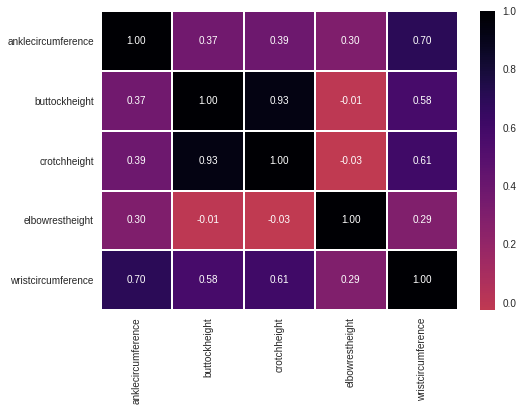

In [177]:
# Create the correlation matrix
corr = head_df.corr()

# Draw the heatmap
sns.heatmap(corr,  cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

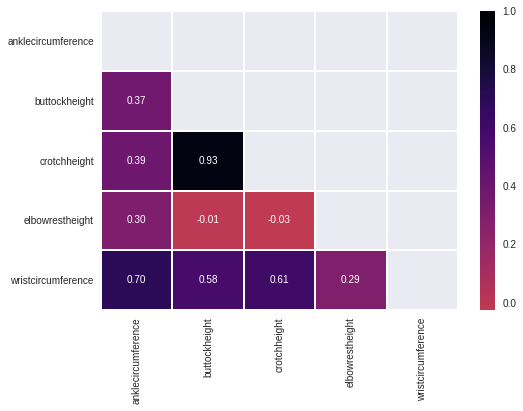

In [180]:
# Create the correlation matrix
corr = head_df.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

### Filtering out highly correlated features
You're going to automate the removal of highly correlated features in the numeric ANSUR dataset. You'll calculate the correlation matrix and filter out columns that have a correlation coefficient of more than 0.95 or less than -0.95.

Since each correlation coefficient occurs twice in the matrix (correlation of A to B equals correlation of B to A) you'll want to ignore half of the correlation matrix so that only one of the two correlated features is removed. Use a mask trick for this purpose.

In [207]:
ansur_df_1 = pd.read_csv('datasets/ANSUR_II_MALE.csv')
ansur_df_2= pd.read_csv('datasets/ANSUR_II_FEMALE.csv')

df = pd.concat([ansur_df_1, ansur_df_2])

In [208]:
# Non-numerical columns in the dataset
non_numeric = ['Gender', 'Height_class', 'Component', 'Branch', 'BMI_class']

# Drop the non-numerical columns from df
df = df.drop(non_numeric, axis=1)

In [209]:
# Create the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))


In [210]:
df.shape[1]

94

In [211]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]

# Drop the features in the to_drop list
reduced_df = df.drop(to_drop, axis=1)

print("The reduced_df dataframe has {} columns".format(df.shape[1]))

The reduced_df dataframe has 94 columns


### Nuclear energy and pool drownings
The dataset that has been pre-loaded for you as weird_df contains actual data provided by the US Centers for Disease Control & Prevention and Department of Energy.

Let's see if we can find a pattern.

Seaborn has been pre-loaded as sns and matplotlib.pyplot as plt.


### Building a diabetes classifier
You'll be using the Pima Indians diabetes dataset to predict whether a person has diabetes using logistic regression. There are 8 features and one target in this dataset. The data has been split into a training and test set and pre-loaded for you as X_train, y_train, X_test, and y_test.

A StandardScaler() instance has been predefined as scaler and a LogisticRegression() one as lr.

In [212]:
indian_df = pd.read_csv('datasets/PimaIndians.csv')

X = indian_df.iloc[:, :-1]
y = indian_df.iloc[:, -1]

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

lr = LogisticRegression()
# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Fit the logistic regression model on the scaled training data
lr.fit(X_train_std, y_train)

# Scale the test features
X_test_std = scaler.transform(X_test)

# Predict diabetes presence on the scaled test set
y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred))) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

93.0% accuracy on test set.
{'pregnant': 4.86}


In [219]:
# Remove the feature with the lowest model coefficient
X = X[['pregnant', 'glucose', 'triceps', 'insulin', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

80.6% accuracy on test set.
{'pregnant': 0.05, 'glucose': 1.24, 'triceps': 0.24, 'insulin': 0.2, 'bmi': 0.39, 'family': 0.34, 'age': 0.35}


In [220]:
# Remove the 2 features with the lowest model coefficients
X = X[[ 'glucose', 'triceps', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

79.6% accuracy on test set.
{'glucose': 1.13, 'triceps': 0.25, 'bmi': 0.34, 'family': 0.34, 'age': 0.37}


In [222]:
# Only keep the feature with the highest coefficient
X = X[['glucose']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model to the data
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

75.5% accuracy on test set.
{'glucose': 1.28}


### Automatic Recursive Feature Elimination
Now let's automate this recursive process. Wrap a Recursive Feature Eliminator (RFE) around our logistic regression estimator and pass it the desired number of features.

All the necessary functions and packages have been pre-loaded and the features have been scaled for you.

In [223]:
from sklearn.feature_selection import RFE

In [227]:
indian_df = pd.read_csv('datasets/PimaIndians.csv')

X = indian_df.iloc[:, :-1]
y = indian_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [231]:
# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)

# Fits the eliminator to the data
rfe.fit(X_train, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))


Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
{'pregnant': 4, 'glucose': 2, 'diastolic': 6, 'triceps': 3, 'insulin': 5, 'bmi': 1, 'family': 1, 'age': 1}


/home/dsntos/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/dsntos/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

In [229]:

# Print the features that are not eliminated
print(X.columns[rfe.support_])



Index(['bmi', 'family', 'age'], dtype='object')


In [230]:
# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 

72.4% accuracy on test set.


### Building a random forest model
You'll again work on the Pima Indians dataset to predict whether an individual has diabetes. This time using a random forest classifier. You'll fit the model on the training data after performing the train-test split and consult the feature importance values.

The feature and target datasets have been pre-loaded for you as X and y. Same goes for the necessary packages and functions.

In [232]:
indian_df = pd.read_csv('datasets/PimaIndians.csv')

X = indian_df.iloc[:, :-1]
y = indian_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [234]:
from sklearn.ensemble import RandomForestClassifier

# Perform a 75% training and 25% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

# Fit the random forest model to the training data
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Calculate the accuracy
acc = accuracy_score(y_test, rf.predict(X_test))

# Print the importances per feature
print(dict(zip(X.columns, rf.feature_importances_.round(2))))

# Print accuracy
print("{0:.1%} accuracy on test set.".format(acc))

{'pregnant': 0.07, 'glucose': 0.25, 'diastolic': 0.09, 'triceps': 0.09, 'insulin': 0.14, 'bmi': 0.12, 'family': 0.12, 'age': 0.13}
79.6% accuracy on test set.


### Random forest for feature selection
Now lets use the fitted random model to select the most important features from our input dataset X.

The trained model from the previous exercise has been pre-loaded for you as rf.

In [235]:
# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.15

# Prints out the mask
print(mask)

[False  True False False False False False False]


In [236]:
# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.15

# Apply the mask to the feature dataset X
reduced_X = X.loc[:, mask]

# prints out the selected column names
print(reduced_X.columns)

Index(['glucose'], dtype='object')


### Recursive Feature Elimination with random forests
You'll wrap a Recursive Feature Eliminator around a random forest model to remove features step by step. This method is more conservative compared to selecting features after applying a single importance threshold. Since dropping one feature can influence the relative importances of the others.

You'll need these pre-loaded datasets: X, X_train, y_train.

Functions and classes that have been pre-loaded for you are: RandomForestClassifier(), RFE(), train_test_split().

In [237]:
# Wrap the feature eliminator around the random forest model
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask using an attribute of rfe
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Index(['glucose', 'insulin'], dtype='object')


In [238]:
# Set the feature eliminator to remove 2 features on each step
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, step=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

Fitting estimator with 8 features.
Fitting estimator with 6 features.
Fitting estimator with 4 features.
Index(['glucose', 'bmi'], dtype='object')


### Creating a LASSO regressor
You'll be working on the numeric ANSUR body measurements dataset to predict a persons Body Mass Index (BMI) using the pre-imported Lasso() regressor. BMI is a metric derived from body height and weight but those two features have been removed from the dataset to give the model a challenge.

You'll standardize the data first using the StandardScaler() that has been instantiated for you as scaler to make sure all coefficients face a comparable regularizing force trying to bring them down.

All necessary functions and classes plus the input datasets X and y have been pre-loaded.

In [242]:
ansur_df_1 = pd.read_csv('datasets/ANSUR_II_MALE.csv')
ansur_df_2= pd.read_csv('datasets/ANSUR_II_FEMALE.csv')
df = pd.concat([ansur_df_1, ansur_df_2])
X = df.drop( ['Gender', 'Height_class', 'Component', 'Branch', 'BMI_class', 'BMI'], axis=1)
y = df.loc[:, 'BMI']

In [243]:
from sklearn.linear_model import Lasso

# Set the test size to 30% to get a 70-30% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Create the Lasso model
la = Lasso()

# Fit it to the standardized training data
la.fit(X_train_std, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### Lasso model results
Now that you've trained the Lasso model, you'll score its predictive capacity (R2) on the test set and count how many features are ignored because their coefficient is reduced to zero.

The X_test and y_test datasets have been pre-loaded for you.

The Lasso() model and StandardScaler() have been instantiated as la and scaler respectively and both were fitted to the training data.

In [244]:
# Transform the test set with the pre-fitted scaler
X_test_std = scaler.transform(X_test)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(X_test_std, y_test)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict 82.9% of the variance in the test set.
The model has ignored 83 out of 93 features.


### Adjusting the regularization strength
Your current Lasso model has an R2 score of 84.7%. When a model applies overly powerful regularization it can suffer from high bias, hurting its predictive power.

Let's improve the balance between predictive power and model simplicity by tweaking the alpha parameter.

In [245]:
# Find the highest alpha value with R-squared above 98%
la = Lasso(alpha=0.1, random_state=0)

# Fits the model and calculates performance stats
la.fit(X_train_std, y_train)
r_squared = la.score(X_test_std, y_test)
n_ignored_features = sum(la.coef_ == 0)

# Print peformance stats 
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))
print("{} out of {} features were ignored.".format(n_ignored_features, len(la.coef_)))

The model can predict 98.5% of the variance in the test set.
69 out of 93 features were ignored.


### Creating a LassoCV regressor
You'll be predicting biceps circumference on a subsample of the male ANSUR dataset using the LassoCV() regressor that automatically tunes the regularization strength (alpha value) using Cross-Validation.

The standardized training and test data has been pre-loaded for you as X_train, X_test, y_train, and y_test.

In [253]:
ansur_df_1 = pd.read_csv('datasets/ANSUR_II_MALE.csv')
ansur_df_2= pd.read_csv('datasets/ANSUR_II_FEMALE.csv')
df = pd.concat([ansur_df_1, ansur_df_2])

X = df.drop( ['Gender', 'Height_class', 'Component', 'Branch', 
              'BMI_class' ,'bicepscircumferenceflexed'], axis=1)
y = df['bicepscircumferenceflexed'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [254]:
from sklearn.linear_model import LassoCV

# Create and fit the LassoCV model on the training set
lcv = LassoCV()
lcv.fit(X_train, y_train)
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))

# Calculate R squared on the test set
r_squared = lcv.score(X_test, y_test)
print('The model explains {0:.1%} of the test set variance'.format(r_squared))

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ != 0
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

Optimal alpha = 3.528
The model explains 90.8% of the test set variance
39 features out of 93 selected


/home/dsntos/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7753.076580510824, tolerance: 733.4009983046858
  positive)


### Ensemble models for extra votes
The LassoCV() model selected 26 out of 32 features. Not bad, but not a spectacular dimensionality reduction either. Let's use two more models to select the 10 features they consider most important using the Recursive Feature Eliminator (RFE).

The standardized training and test data has been pre-loaded for you as X_train, X_test, y_train, and y_test.

In [261]:
ansur_df_1 = pd.read_csv('datasets/ANSUR_II_MALE.csv')
ansur_df_2= pd.read_csv('datasets/ANSUR_II_FEMALE.csv')
df = pd.concat([ansur_df_1, ansur_df_2])

X = df.drop( ['Gender', 'Height_class', 'Component', 'Branch', 
              'BMI_class' ,'bicepscircumferenceflexed'], axis=1)
y = df['bicepscircumferenceflexed'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [262]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
gb_mask = rfe_gb.support_

Fitting estimator with 93 features.
Fitting estimator with 90 features.
Fitting estimator with 87 features.
Fitting estimator with 84 features.
Fitting estimator with 81 features.
Fitting estimator with 78 features.
Fitting estimator with 75 features.
Fitting estimator with 72 features.
Fitting estimator with 69 features.
Fitting estimator with 66 features.
Fitting estimator with 63 features.
Fitting estimator with 60 features.
Fitting estimator with 57 features.
Fitting estimator with 54 features.
Fitting estimator with 51 features.
Fitting estimator with 48 features.
Fitting estimator with 45 features.
Fitting estimator with 42 features.
Fitting estimator with 39 features.
Fitting estimator with 36 features.
Fitting estimator with 33 features.
Fitting estimator with 30 features.
Fitting estimator with 27 features.
Fitting estimator with 24 features.
Fitting estimator with 21 features.
Fitting estimator with 18 features.
Fitting estimator with 15 features.
Fitting estimator with 12 fe

In [263]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Select 10 features with RFE on a RandomForestRegressor, drop 3 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_rf.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
rf_mask = rfe_rf.support_

Fitting estimator with 93 features.
Fitting estimator with 90 features.
Fitting estimator with 87 features.
Fitting estimator with 84 features.
Fitting estimator with 81 features.
Fitting estimator with 78 features.
Fitting estimator with 75 features.
Fitting estimator with 72 features.
Fitting estimator with 69 features.
Fitting estimator with 66 features.
Fitting estimator with 63 features.
Fitting estimator with 60 features.
Fitting estimator with 57 features.
Fitting estimator with 54 features.
Fitting estimator with 51 features.
Fitting estimator with 48 features.
Fitting estimator with 45 features.
Fitting estimator with 42 features.
Fitting estimator with 39 features.
Fitting estimator with 36 features.
Fitting estimator with 33 features.
Fitting estimator with 30 features.
Fitting estimator with 27 features.
Fitting estimator with 24 features.
Fitting estimator with 21 features.
Fitting estimator with 18 features.
Fitting estimator with 15 features.
Fitting estimator with 12 fe

### Combining 3 feature selectors
We'll combine the votes of the 3 models you built in the previous exercises, to decide which features are important into a meta mask. We'll then use this mask to reduce dimensionality and see how a simple linear regressor performs on the reduced dataset.

The per model votes have been pre-loaded as lcv_mask, rf_mask, and gb_mask and the feature and target datasets as X and y.

In [ ]:
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)
print(votes)

In [ ]:
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3
print(meta_mask)

In [ ]:
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3

# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]
print(X_reduced.columns)

In [ ]:
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3

# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]
print(X_reduced.columns)

### Manual feature extraction I
You want to compare prices for specific products between stores. The features in the pre-loaded dataset sales_df are: storeID, product, quantity and revenue. The quantity and revenue features tell you how many items of a particular product were sold in a store and what the total revenue was. For the purpose of your analysis it's more interesting to know the average price per product.

In [264]:
sales_df = pd.read_csv('datasets/grocery_sales.csv')

In [265]:
# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue'] / sales_df['quantity']

# Drop the quantity and revenue features
reduced_df = sales_df.drop(['quantity', 'revenue'], axis=1)

print(reduced_df.head())

  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


### Manual feature extraction II
You're working on a variant of the ANSUR dataset, height_df, where a person's height was measured 3 times. Add a feature with the mean height to the dataset, then drop the 3 original features.

In [285]:
# # Calculate the mean height
# height_df['height'] = height_df[['height_1', 'height_2', 'height_3']].mean(axis=1)

# # Drop the 3 original height features
# reduced_df = height_df.drop(['height_1', 'height_2', 'height_3'], axis=1)

# print(reduced_df.head())

### Calculating Principal Components
You'll visually inspect a 4 feature sample of the ANSUR dataset before and after PCA using Seaborn's pairplot(). This will allow you to inspect the pairwise correlations between the features.

The data has been pre-loaded for you as ansur_df.

In [291]:
columns = ['stature_m', 'buttockheight', 'waistcircumference', 'shouldercircumference']
ansur_df_1 = pd.read_csv('datasets/ANSUR_II_MALE.csv', usecols=columns)
ansur_df_2= pd.read_csv('datasets/ANSUR_II_FEMALE.csv', usecols=columns)

ansur_df = pd.concat([ansur_df_1, ansur_df_2])

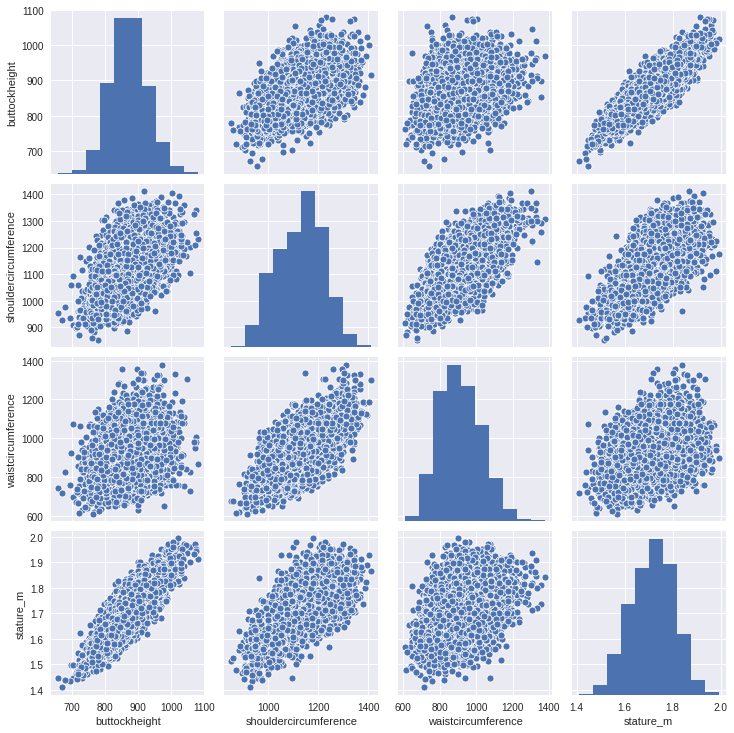

In [292]:
# Create a pairplot to inspect ansur_df
sns.pairplot(ansur_df)

plt.show()

In [289]:
ansur_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 99 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Branch                          1986 non-null   object 
 1   Component                       1986 non-null   object 
 2   Gender                          1986 non-null   object 
 3   abdominalextensiondepthsitting  1986 non-null   int64  
 4   acromialheight                  1986 non-null   int64  
 5   acromionradialelength           1986 non-null   int64  
 6   anklecircumference              1986 non-null   int64  
 7   axillaheight                    1986 non-null   int64  
 8   balloffootcircumference         1986 non-null   int64  
 9   balloffootlength                1986 non-null   int64  
 10  biacromialbreadth               1986 non-null   int64  
 11  bicepscircumferenceflexed       1986 non-null   int64  
 12  bicristalbreadth                19

In [293]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the scaler and standardize the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)

# This changes the numpy array output back to a dataframe
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

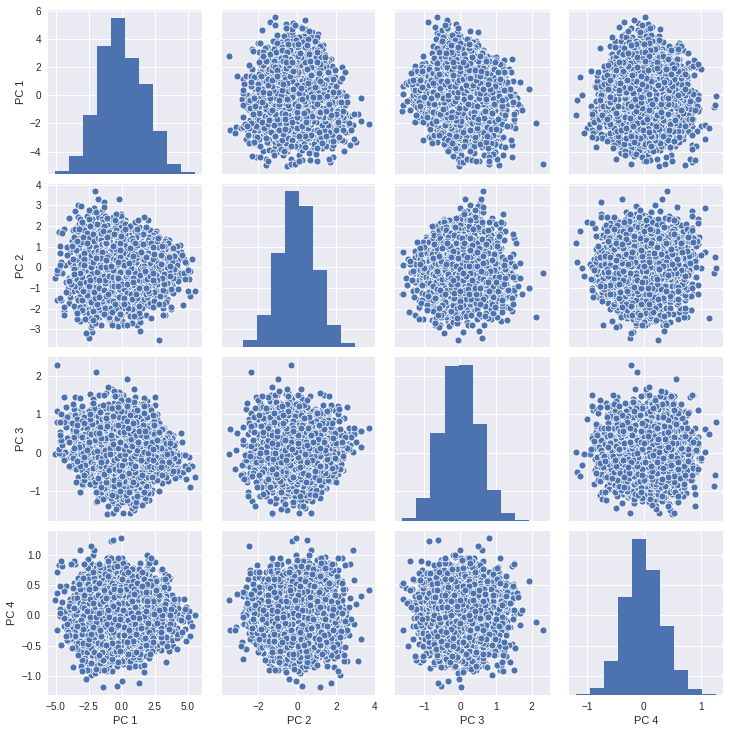

In [294]:
# Create a pairplot of the principal component dataframe
sns.pairplot(pc_df)
plt.show()

### PCA on a larger dataset
You'll now apply PCA on a somewhat larger ANSUR datasample with 13 dimensions, once again pre-loaded as ansur_df. The fitted model will be used in the next exercise. Since we are not using the principal components themselves there is no need to transform the data, instead, it is sufficient to fit pca to the data.

In [296]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Apply PCA
pca = PCA()
pca.fit(ansur_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [297]:
# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

[0.68770408 0.22168558 0.06350922 0.02710112]


In [298]:
# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

[0.68770408 0.90938967 0.97289888 1.        ]


### Understanding the components
You'll apply PCA to the numeric features of the Pokemon dataset, poke_df, using a pipeline to combine the feature scaling and PCA in one go. You'll then interpret the meanings of the first two components.

All relevant packages and classes have been pre-loaded for you (Pipeline(), StandardScaler(), PCA()).

In [307]:
pokemon = pd.read_csv('datasets/pokemon.csv')
poke_df = pokemon.iloc[:, 4:-1]

In [308]:
from sklearn.pipeline import Pipeline

# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=2))])

In [309]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=2))])

# Fit it to the dataset and extract the component vectors
pipe.fit(poke_df)
vectors = pipe.steps[1][1].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(poke_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(poke_df.columns, vectors[1]))))

PC 1 effects = {'Total': 0.52, 'HP': 0.33, 'Attack': 0.38, 'Defense': 0.31, 'Sp. Atk': 0.39, 'Sp. Def': 0.38, 'Speed': 0.29, 'Generation': 0.04}
PC 2 effects = {'Total': -0.01, 'HP': 0.1, 'Attack': 0.0, 'Defense': 0.57, 'Sp. Atk': -0.28, 'Sp. Def': 0.2, 'Speed': -0.64, 'Generation': 0.36}


### PCA for feature exploration
You'll use the PCA pipeline you've built in the previous exercise to visually explore how some categorical features relate to the variance in poke_df. These categorical features (Type & Legendary) can be found in a separate dataframe poke_cat_df.

All relevant packages and classes have been pre-loaded for you (Pipeline(), StandardScaler(), PCA())

In [310]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

print(pc)

[[-1.88828896 -0.51950497]
 [-0.49265201 -0.56235125]
 [ 1.42997255 -0.59541581]
 ...
 [ 2.86117152  0.07428026]
 [ 4.12822037 -0.32694247]
 [ 2.67954563  1.05494327]]


In [313]:
poke_cat_df = pokemon.loc[:, ['Type 1', 'Legendary']]

In [314]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

print(poke_cat_df.head())

  Type 1  Legendary      PC 1      PC 2
0  Grass      False -1.888289 -0.519505
1  Grass      False -0.492652 -0.562351
2  Grass      False  1.429973 -0.595416
3  Grass      False  3.009493  0.081776
4   Fire      False -2.094507 -1.159673


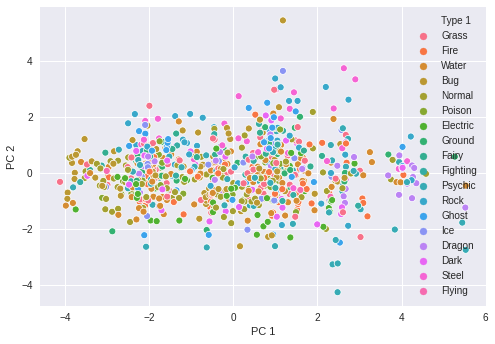

In [317]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

# Use the Type feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Type 1')
plt.show()

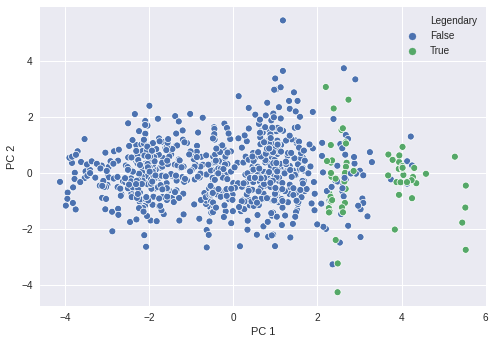

In [318]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

# Use the Legendary feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Legendary')
plt.show()

### PCA in a model pipeline
We just saw that legendary Pokemon tend to have higher stats overall. Let's see if we can add a classifier to our pipeline that detects legendary versus non-legendary Pokemon based on the principal components.

The data has been pre-loaded for you and split into training and tests datasets: X_train, X_test, y_train, y_test.

Same goes for all relevant packages and classes(Pipeline(), StandardScaler(), PCA(), RandomForestClassifier()).

In [322]:
pokemon = pd.read_csv('datasets/pokemon.csv')
X = pokemon.iloc[:, 4:-1] 
y = pokemon.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=21)

In [323]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(random_state=0))])

In [324]:

# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Prints the explained variance ratio
print(pipe.steps[1][1].explained_variance_ratio_)

[0.46894531 0.13894043]


In [325]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the model accuracy
print('{0:.1%} test set accuracy'.format(accuracy))

95.0% test set accuracy


In [326]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))

[0.46894531 0.13894043 0.12047362]
93.1% test set accuracy


### Selecting the proportion of variance to keep
You'll let PCA determine the number of components to calculate based on an explained variance threshold that you decide.

You'll work on the numeric ANSUR female dataset pre-loaded as ansur_df.

All relevant packages and classes have been pre-loaded too (Pipeline(), StandardScaler(), PCA()).

In [327]:
# Pipe a scaler to PCA selecting 80% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.8))])

# Fit the pipe to the data
pipe.fit(ansur_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

In [ ]:
# Let PCA select 90% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=.9))])

# Fit the pipe to the data
pipe.fit(ansur_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

### Choosing the number of components
You'll now make a more informed decision on the number of principal components to reduce your data to using the "elbow in the plot" technique. One last time, you'll work on the numeric ANSUR female dataset pre-loaded as ansur_df.

All relevant packages and classes have been pre-loaded for you (Pipeline(), StandardScaler(), PCA()).

In [ ]:
# Pipeline a scaler and pca selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=10))])

# Fit the pipe to the data
pipe.fit(ansur_df)

# Plot the explained variance ratio
plt.plot(pipe.steps[1][1].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

### PCA for image compression
You'll reduce the size of 16 images with hand written digits (MNIST dataset) using PCA.

The samples are 28 by 28 pixel gray scale images that have been flattened to arrays with 784 elements each (28 x 28 = 784) and added to the 2D numpy array X_test. Each of the 784 pixels has a value between 0 and 255 and can be regarded as a feature.

A pipeline with a scaler and PCA model to select 78 components has been pre-loaded for you as pipe. This pipeline has already been fitted to the entire MNIST dataset except for the 16 samples in X_test.

Finally, a function plot_digits has been created for you that will plot 16 images in a grid.

In [ ]:
# Transform the input data to principal components
pc = pipe.transform(X_test)

# Prints the number of features per dataset
print("X_test has {} features".format(X_test.shape[1]))
print("pc has {} features".format(pc.shape[1]))

In [ ]:
# Transform the input data to principal components
pc = pipe.transform(X_test)

# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Prints the number of features
print("X_rebuilt has {} features".format(X_rebuilt.shape[1]))

In [ ]:
# Transform the input data to principal components
pc = pipe.transform(X_test)

# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Plot the reconstructed data
plot_digits(X_rebuilt)